In [3]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes as nb 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
from pylab import savefig
import matplotlib.pyplot as plt

def confusion_matrix11(file,num):
# load dataset
  dataframe = pandas.read_table(file)
  data = dataframe.drop("No.", axis=1)
  data = data.drop("StdPageRank", axis=1)
  data = data.drop("VarPageRank", axis=1)
  dataset = data.values

  #print(dataset.shape)

  # split into input (X) and output (Y) variables

  #l = 36893 
  l = num
  X = dataset[:,0:]
  # Y = dataset[100:200, 1:10]
  # for col in data.columns: 
  #     print(col)
  # print(X.shape)
  labels = []
  for i in range (0,l):
    if X[i][9] == True:
      labels.append(0)
    else:
      labels.append(1)

  # print(labels.count(0))
  # print(labels.count(1))
  features = X[0:l,0:9]





  # Split our data
  train, test, train_labels, test_labels = train_test_split(features,
                                                            labels,
                                                            test_size=0.33,
                                                            random_state=42)
  

  # Initialize our classifier
  gnb = nb.GaussianNB()
  

  # Train our classifier
  model = gnb.fit(train, train_labels)

  preds = gnb.predict(test)
  cm = confusion_matrix(test_labels, preds)
  # print(preds)
  print(accuracy_score(test_labels, preds))
  # cls = classification_report(test_labels, preds)
  print(cm)
  return cm


print("diagnostic")
cm_diagnostic = confusion_matrix11('/content/diagnostic_attackfree_GraphFeatures.txt', 2513)
print("dos")
cm_dos = confusion_matrix11('/content/dos_attackfree_GraphFeatures.txt',2643)
print("fuzzycandid")
cm_fuzzycandid = confusion_matrix11('/content/fuzzing_canid_attackfree_GraphFeatures.txt',2513)
print("fuzzypayload")
cm_fuzzypayload = confusion_matrix11('/content/fuzzing_payload_attackfree_GraphFeatures.txt',2513)
print("replay")
cm_replay =confusion_matrix11('/content/replay_attackfree_GraphFeatures.txt',2514)

print("suspension")
cm_suspension = confusion_matrix11('/content/suspension_attackfree_GraphFeatures.txt',2511)
print("mixed")
cm_complete = confusion_matrix11('/content/complete_renault_graph_GraphFeatures.txt', 5542)



cm_overall = cm_dos+cm_diagnostic+cm_fuzzycandid+cm_fuzzypayload+cm_replay+cm_suspension+cm_complete
print("Overall")
print(cm_overall)

diagnostic
0.4674698795180723
[[385 442]
 [  0   3]]
dos
1.0
[[817   0]
 [  0  56]]
fuzzycandid
0.9289156626506024
[[771  58]
 [  1   0]]
fuzzypayload
0.9987951807228915
[[829   0]
 [  1   0]]
replay
1.0
[[830]]
suspension
0.20868516284680338
[[151 655]
 [  1  22]]
mixed
0.9825041006014216
[[1740    2]
 [  30   57]]
Overall
[[5523 1987]
 [ 863  968]]


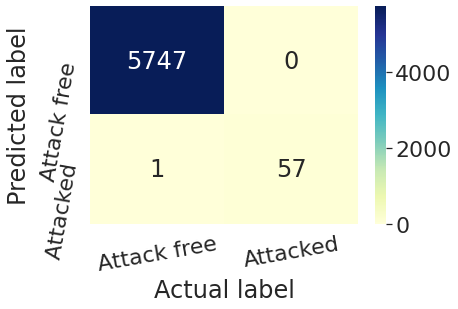

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
from pylab import savefig
import matplotlib.pyplot as plt
%matplotlib inline



cm_matrix = pd.DataFrame(data=cm_dos, columns=['Attack free', 'Attacked'], 
                                 index=['   Attack free ', ' Attacked'])
sns.set(font_scale=2)
sns.heatmap(cm_matrix, annot=True, fmt= 'd', cmap='YlGnBu')
# plt.title("Confusion Matrix for All attack")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.yticks(rotation = 80)
plt.xticks(rotation = 10)
plt.rcParams['font.size'] = 4
plt.rcParams['figure.figsize'] = (1, 1)   
plt.savefig('confusion_opel_dos.pdf', bbox_inches = "tight")
plt.savefig('confusion_opel_dos.PNG', bbox_inches = "tight")
plt.savefig('confusion_opel_dos.svg', bbox_inches = "tight")
# cls = classification_report(test_labels, preds, digits = 5)
# figure2 = cls.get_figure()
# figure2.savefig('svm_conf2.pdf')

#plt.rcParams['font.size'] = 12
# # plot histogram with 10 bins
# plt.hist(preds, bins = 10)

# plt.xlabel('Predicted')
# plt.ylabel('Frequency


In [ ]:
def fun(cm):
  tp = cm[0][0]
  fn = cm[0][1]
  fp = cm[1][0]
  tn = cm[1][1]
  pr = tp/(tp+fp)
  re = tp/(tp+fn)
  f1 = 2*pr*re/ (pr+re)
  print((tp+tn)/(tp+tn+fp+fn))
  print(str(pr)+" "+str(re)+" "+str(f1))

print("diagnostic")
fun(cm_diagnostic)
print("dos")
fun(cm_dos)
print("fuzzy_candid")
fun(cm_fuzzycandid)
print("fuzzy_payload")
fun(cm_fuzzypayload)
print("replay")
fun(cm_replay)
print("suspension")
fun(cm_suspension) 
print("complete")
fun(cm_complete)

print("overall")
fun(cm_diagnostic+cm_dos+cm_fuzzycandid+cm_fuzzypayload+cm_replay+cm_suspension+cm_complete)



diagnostic
0.8277594870906255
0.9995815024063611 0.828046455191541 0.9057641259006447
dos
0.9998277347114557
0.9998260264439806 1.0 0.9999130056546325
fuzzy_candid
0.7891180038121642
0.9997804128238911 0.7892182353960825 0.8821079143659788
fuzzy_payload
0.9889100675792757
1.0 0.9889100675792757 0.9944241156995992
replay
0.8197885981632299
0.8199306759098787 0.9997886728655959 0.9009712435726528
suspension
0.9951473136915078
0.9951473136915078 1.0 0.9975677553856845
complete
0.9089304340848913
0.9084745762711864 0.9999111663853603 0.9520023681650949
overall
0.9049488561606044
0.9506909969139944 0.949226337999866 0.9499581028992793
